# Time Series Decomposition

## Decomposing

Time series decomposition is a mathematical procedure which transforms a time series into multiple different time series. The original time series is often split into 3 component series:

>Seasonal: Patterns that repeat with a fixed period of time. For example, a website might receive more visits during weekends; this would produce data with a seasonality of 7 days.

>Trend: The underlying trend of the metrics. A website increasing in popularity should show a general trend that goes up.

>Random: Also call “noise”, “irregular” or “remainder,” this is the residuals of the original time series after the seasonal and trend series are removed.

## Additive or Multiplicative Decomposition?

To achieve successful decomposition, it is important to choose between the additive and multiplicative models, which requires analyzing the series. For example, does the magnitude of the seasonality increase when the time series increases?

![](http://kourentzes.com/forecasting/wp-content/uploads/2014/11/mseas.fig1_.png)


Fortunately, `statsmodels` provides the convenient `seasonal_decompose` function to perform such decomposition out of the box. Details of this function are available [here](http://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html). 

Let's use this function to perform following tasks:
1. Import `seasonal_decompose` from statsmodels.
2. Apply `seasonal_decompose` to log transformed TS. 
3. Plot the trend, seasonality and residual. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import copy
from pylab import rcParams

%matplotlib inline
warnings.filterwarnings('ignore')


In [35]:
df = pd.read_csv('electricity.csv', index_col=0, parse_dates=True)
df.head(10)

,Bill
Time,
2008-01-01,430
2008-02-01,160
2008-03-01,201
2008-04-01,271
2008-05-01,273
2008-06-01,275
2008-07-01,250
2008-08-01,260
2008-09-01,276


In [36]:
df.tail(10)

,Bill
Time,
2019-03-01,460
2019-04-01,790
2019-05-01,875
2019-06-01,746
2019-07-01,680
2019-08-01,710
2019-09-01,715
2019-10-01,600
2019-11-01,750


In [5]:
def show_plot(
    df,
    color="blue",
    linestyle="-",
    xlabel="Time",
    ylabel="Bill",
    label=None,
):
    plt.plot(df.index, df, color=color, label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc=2)


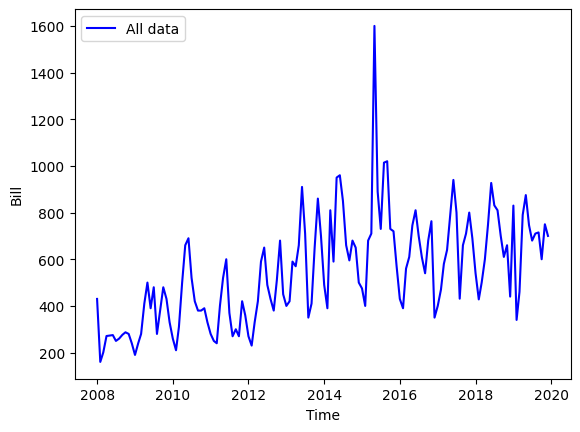

In [6]:
show_plot(df, label="All data")

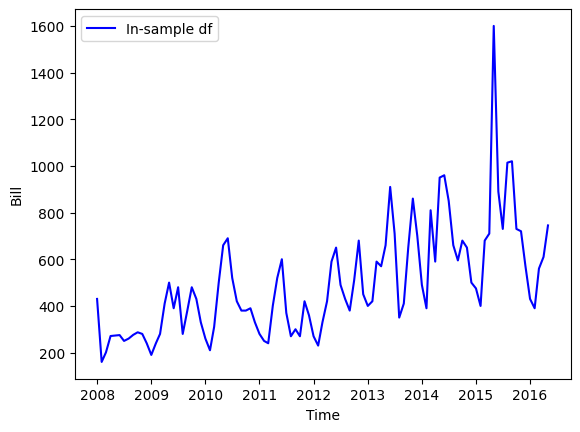

In [7]:
def tt_split(df, seperator=0.7):
    """
    Input:
        df: df, (n,1)
        seperator: float, (0,1). string, 'MMM-YYYY'.
    Output:
        trainin, test: df
    """
    try:
        n = int(df.shape[0] * seperator)
        return df[: n + 1], df[n + 1 :]
    except:
        return df[:seperator], df[seperator:]


train, test = tt_split(df)
show_plot(train, label="In-sample df")

In [8]:
train.head()


,Bill
Time,
2008-01-01,430
2008-02-01,160
2008-03-01,201
2008-04-01,271
2008-05-01,273


In [9]:
train.tail()


,Bill
Time,
2016-01-01,430
2016-02-01,390
2016-03-01,560
2016-04-01,610
2016-05-01,745


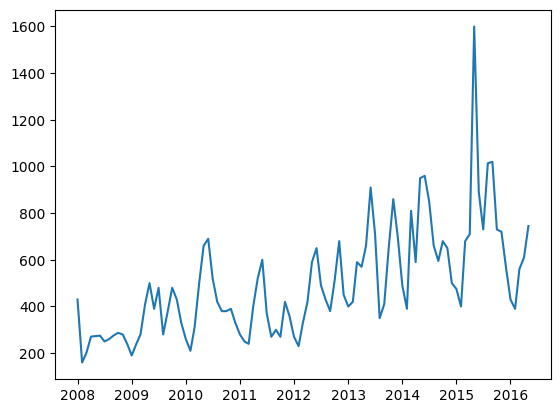

In [10]:
plt.plot(train)


In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [12]:
result = seasonal_decompose(train, model="additive")

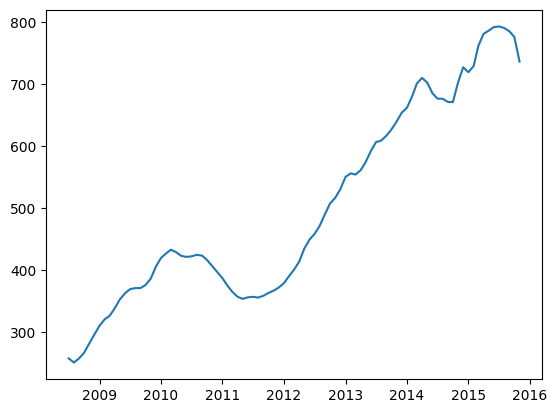

In [13]:
plt.plot(result.trend)


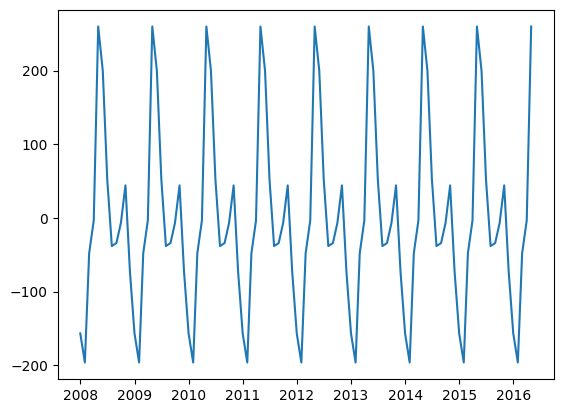

In [14]:
plt.plot(result.seasonal)


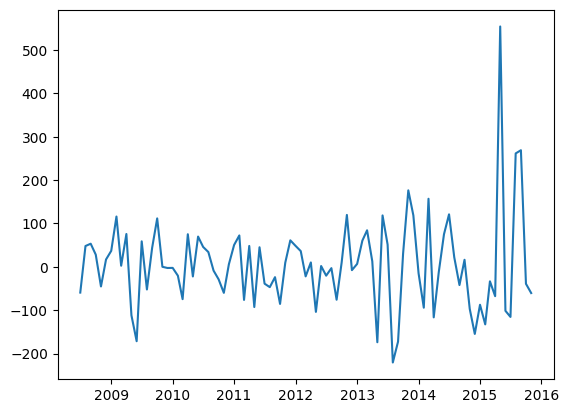

In [15]:
plt.plot(result.resid)


In [41]:
# Fitting a degree 2 polynomial to the trend
order = 2
coef = np.polyfit(
    np.arange(len(train["Bill"])),
    train["Bill"].values.ravel(),
    order,
)
coef

array([1.31972421e-02, 3.91796945e+00, 2.54771955e+02])

In [42]:
poly_mdl = np.poly1d(coef)
poly_mdl


poly1d([1.31972421e-02, 3.91796945e+00, 2.54771955e+02])

In [43]:
trend = pd.Series(
    data=poly_mdl(np.arange(len(train["Bill"]))), index=train.index
)

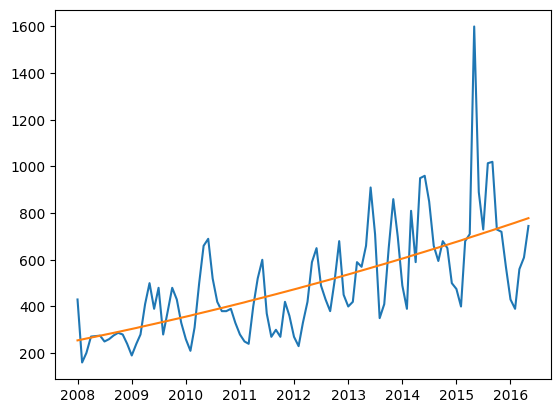

In [44]:
plt.plot(train)
plt.plot(trend)
plt.show()


In [45]:
detrended = train["Bill"] - trend

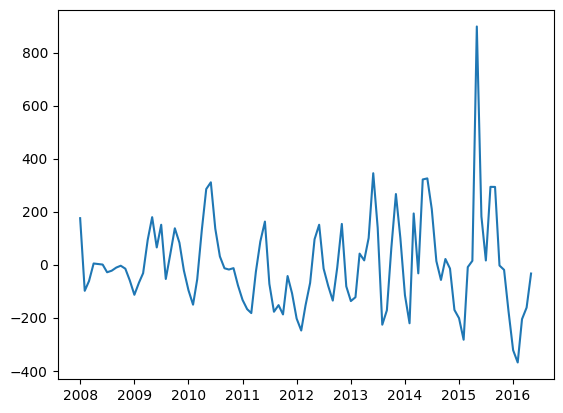

In [46]:
plt.plot(detrended)


In [47]:
seasonal = detrended.groupby(by=detrended.index.month).mean()

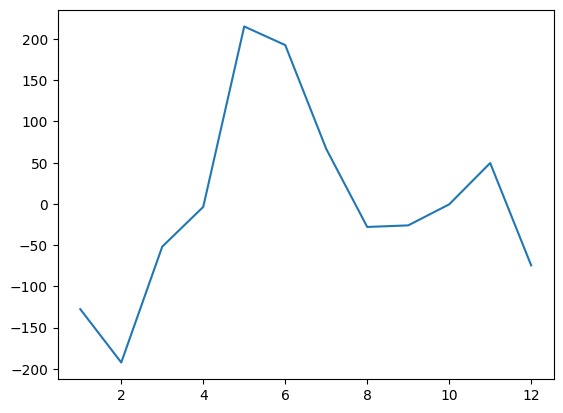

In [48]:
plt.plot(seasonal)


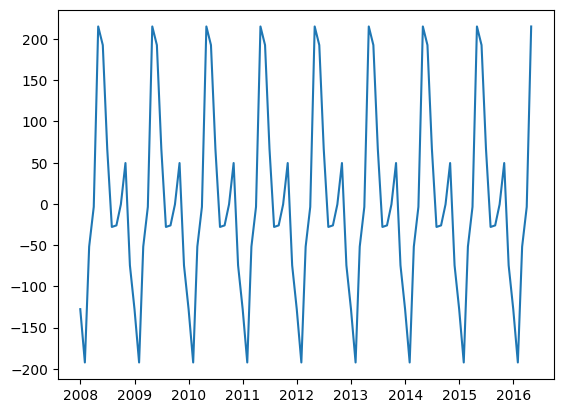

In [49]:
col = "Bill"
seasonal_component = copy.deepcopy(train)
for i in seasonal.index:
    seasonal_component.loc[seasonal_component.index.month == i, col] = seasonal.loc[i]
plt.plot(seasonal_component)

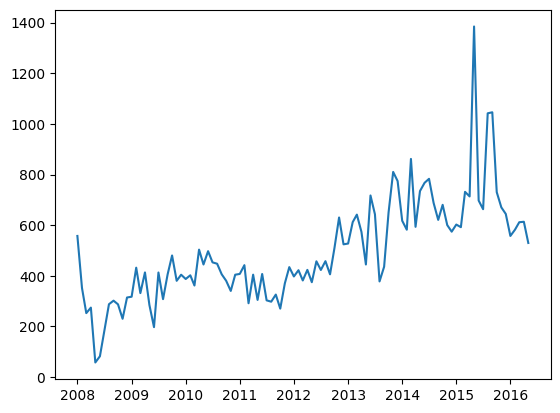

In [50]:
deseasonal = train - seasonal_component
plt.plot(deseasonal)


In [51]:
coef = np.polyfit(np.arange(len(deseasonal)), deseasonal["Bill"], order)
coef

array([1.80019095e-02, 3.42117930e+00, 2.63515826e+02])

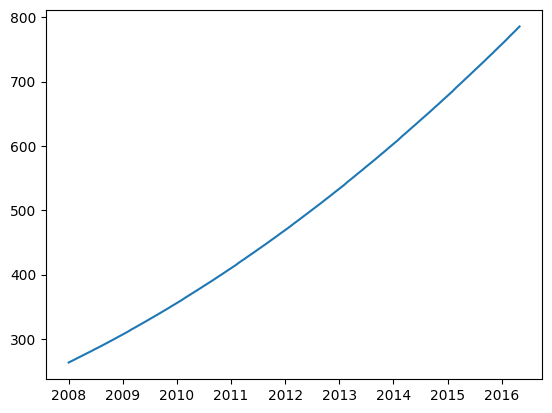

In [52]:
poly_mdl = np.poly1d(coef)
trend_comp = pd.DataFrame(
    data=poly_mdl(np.arange(len(train["Bill"]))),
    index=train.index,
    columns=["Bill"],
)
plt.plot(trend_comp)

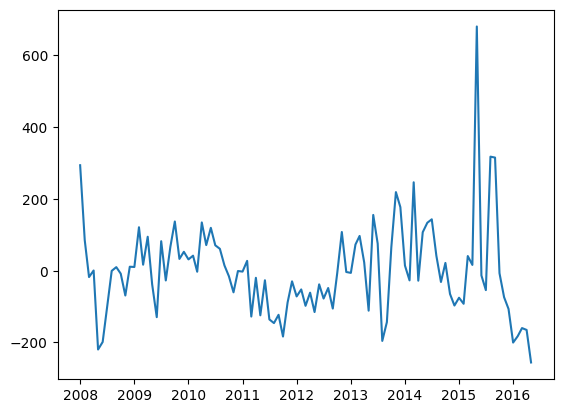

In [53]:
residual = train - seasonal_component - trend_comp
plt.plot(residual)


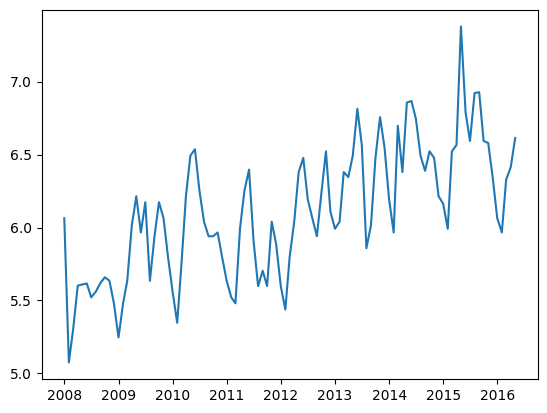

In [54]:
plt.plot(np.log(train))


In [55]:
result_log = seasonal_decompose(np.log(train), model="additive")

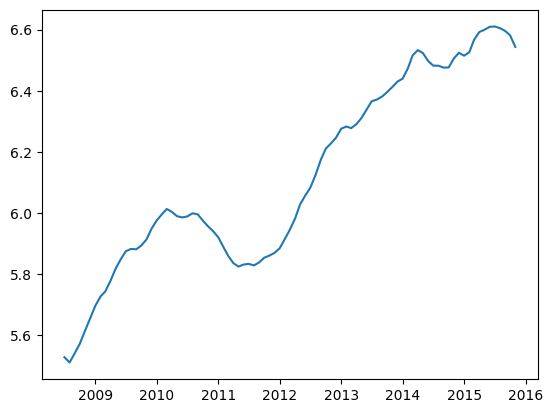

In [56]:
plt.plot(result_log.trend)


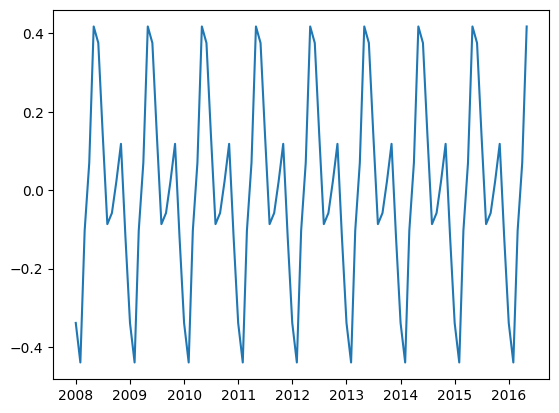

In [57]:
plt.plot(result_log.seasonal)

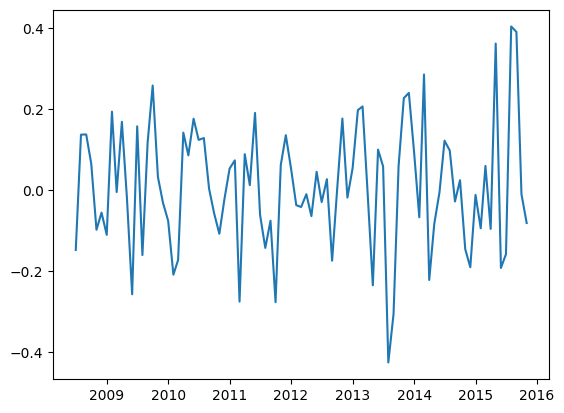

In [58]:
plt.plot(result_log.resid)


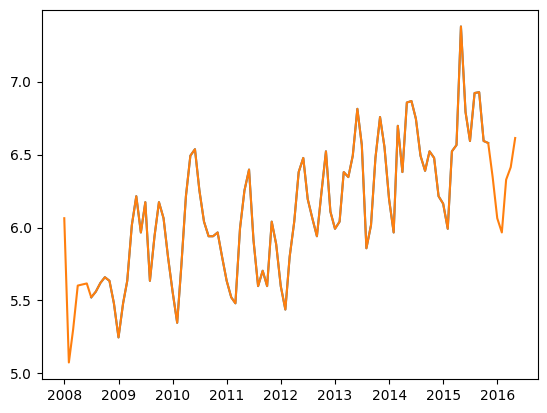

In [59]:
plt.plot(result_log.resid + result_log.trend + result_log.seasonal)
plt.plot(np.log(train))
plt.show()
